# Image Classification with CNN

## Data Processing

### Installing Tensorflow.

In [75]:
pip install tensorflow


SyntaxError: invalid syntax (1723389415.py, line 1)

In [77]:
pip install mlflow

### Importing libraries I need.

In [82]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import mlflow
import mlflow.sklearn

### A little bit of data exploration. Verifying the shape of the data. 

In [8]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

### Identifying the classes in the data set!

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

### Reshaping the y_train for better modeling.

In [14]:
y_train = y_train.reshape(-1,)
y_train[:5]
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Preparing plot samples for the training.

In [17]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    
    label_index = y[index] if isinstance(y[index], int) else np.argmax(y[index])
    
    plt.xlabel(classes[label_index])  
    plt.show()

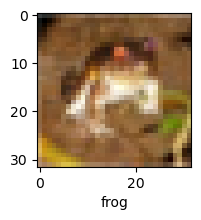

In [19]:
plot_sample(X_train, y_train, 0)

## Starting the training!

In [22]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [24]:
cnn = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

### Chose Adam for optimizer. 

In [27]:
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Early stopping.

In [30]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5,         
    restore_best_weights=True
)

### Oficially training!

In [33]:
history = cnn.fit(
    X_train, y_train,                  
    validation_split=0.2,              
    epochs=1,                         
    batch_size=64,                     
    callbacks=[early_stopping],        
    verbose=2                          
)

625/625 - 22s - 35ms/step - accuracy: 0.4402 - loss: 1.5512 - val_accuracy: 0.5482 - val_loss: 1.2915


In [35]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


array([[1.6051186e-02, 3.7761810e-03, 6.8776369e-02, 6.0764742e-01,
        1.5654923e-02, 1.3442245e-01, 1.1452844e-01, 1.2247746e-02,
        2.0640058e-02, 6.2552504e-03],
       [2.0123488e-01, 1.8022321e-01, 3.3489766e-04, 6.7270994e-05,
        6.8493006e-05, 3.1399427e-06, 1.3446534e-04, 9.3615836e-06,
        5.6554693e-01, 5.2377287e-02],
       [2.2090767e-01, 2.2925392e-01, 8.8005392e-03, 4.7196290e-03,
        2.8279689e-03, 1.0710272e-03, 2.1346519e-03, 2.5962563e-03,
        4.3699226e-01, 9.0696178e-02],
       [3.7965351e-01, 2.4048228e-02, 4.6455618e-03, 1.3290688e-03,
        2.1354205e-03, 1.1322630e-04, 1.4081073e-03, 6.0073903e-04,
        5.6807506e-01, 1.7991053e-02],
       [2.5167256e-03, 2.3893320e-03, 8.6943112e-02, 1.2479517e-01,
        3.6097133e-01, 4.7457259e-02, 3.6242855e-01, 8.7409606e-03,
        2.2934461e-03, 1.4641412e-03]], dtype=float32)

In [37]:
test_loss, test_accuracy = cnn.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

313/313 - 2s - 8ms/step - accuracy: 0.5536 - loss: 1.2806
Test Loss: 1.2806, Test Accuracy: 0.5536


## Accuracy:

### We have an accuracy of 68% and a test loss of 95%.

In [41]:
y_pred_probs = cnn.predict(X_test)

y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


## Compute metrics.

In [44]:
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))

print("Accuracy:", accuracy_score(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

    airplane       0.56      0.60      0.58      1000
  automobile       0.68      0.68      0.68      1000
        bird       0.52      0.31      0.39      1000
         cat       0.41      0.44      0.42      1000
        deer       0.49      0.45      0.47      1000
         dog       0.53      0.45      0.49      1000
        frog       0.61      0.63      0.62      1000
       horse       0.50      0.74      0.60      1000
        ship       0.58      0.68      0.63      1000
       truck       0.67      0.56      0.61      1000

    accuracy                           0.55     10000
   macro avg       0.56      0.55      0.55     10000
weighted avg       0.56      0.55      0.55     10000

Accuracy: 0.5536


## Visualizing the Confusion Matrix!

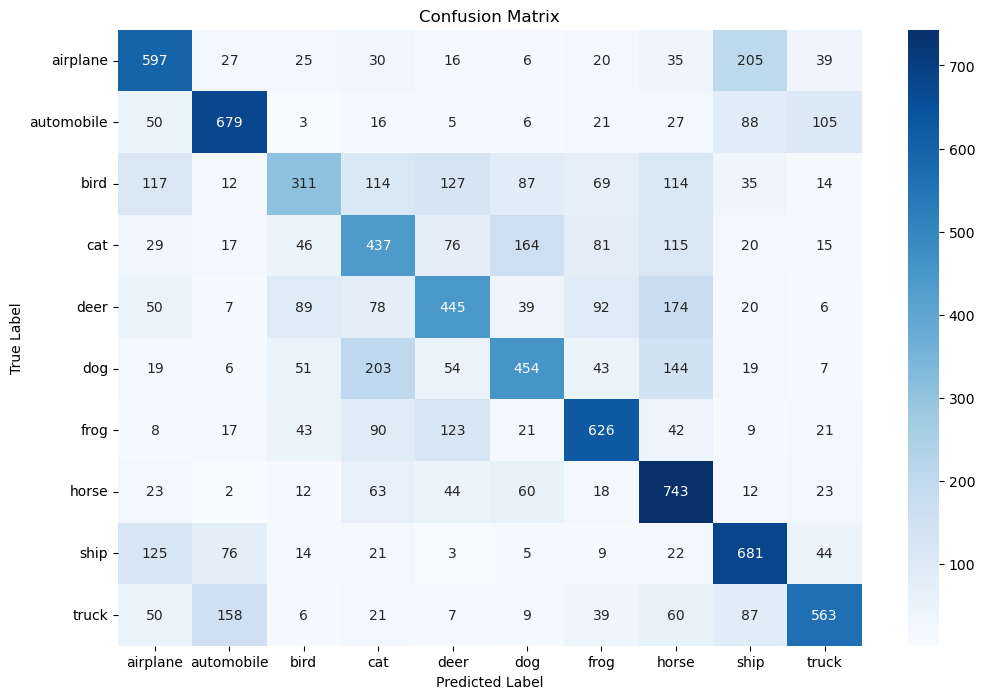

In [47]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Transfer Learning

### In this section I will be doing the transfer learning. I chose VGG16, because it's well-suited for image classification tasks like CIFAR-100 due to its simplicity and effectiveness.



In [51]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Resizing, Conv2D, Flatten, Dense

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [53]:
for layer in base_model.layers:
    layer.trainable = False

In [55]:
model = Sequential([
    base_model,  # Pre-trained VGG16
    Flatten(),
    Dense(256, activation='relu'),  # Custom dense layer
    Dropout(0.5),                   # Dropout to prevent overfitting
    Dense(10, activation='softmax')  # Final layer for 10 classes (e.g., CIFAR-10)
])

In [57]:
import numpy as np
import tensorflow as tf

def preprocess_and_save(images, target_size, batch_size, output_file):
    with open(output_file, 'wb') as f:
        for i in range(0, len(images), batch_size):
            batch = images[i:i + batch_size]
            resized_batch = [tf.image.resize(img, target_size).numpy() for img in batch]
            np.save(f, resized_batch)

# Use smaller batch sizes
batch_size = 1000
preprocess_and_save(X_train, (224, 224), batch_size, "X_train_resized.npy")
preprocess_and_save(X_test, (224, 224), batch_size, "X_test_resized.npy")
# Optimize resizing by processing in smaller batches
batch_size = 16


In [59]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu'),  # Reduced number of neurons
    Dense(10, activation='softmax')  # 10 classes
])

In [63]:
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    if image.shape[-1] != 3: 
        image = tf.image.grayscale_to_rgb(image)
    image = image / 255.0
    return image, label

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Take smaller subsets for memory efficiency
small_train_dataset = train_dataset.take(100)  # Use only 100 samples for training
small_test_dataset = test_dataset.take(50)    # Use only 50 samples for testing

# Apply batching
small_train_dataset = small_train_dataset.batch(16)  # Reduced batch size
small_test_dataset = small_test_dataset.batch(16)


In [65]:
# Define the model with an Input layer
model = Sequential([
    Input(shape=(32, 32, 3)),           # Specify the input shape
    Resizing(224, 224),                # Resize images to (224, 224)
    Conv2D(32, (3, 3), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')    # Example output layer for 10 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [67]:
def save_preprocessed_batches(X, y, batch_size, prefix):
    for i in range(0, len(X), batch_size):
        X_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        np.save(f'{prefix}_X_batch_{i}.npy', X_batch)
        np.save(f'{prefix}_y_batch_{i}.npy', y_batch)

save_preprocessed_batches(X_train, y_train, batch_size=1000, prefix='train')
save_preprocessed_batches(X_test, y_test, batch_size=1000, prefix='test')

# Load the preprocessed batches during training
def load_batch(prefix, batch_idx):
    X_batch = np.load(f'{prefix}_X_batch_{batch_idx}.npy')
    y_batch = np.load(f'{prefix}_y_batch_{batch_idx}.npy')
    return tf.data.Dataset.from_tensor_slices  # Added batching and preprocessing to handle memory((X_batch, y_batch)).batch(32)
# Apply batching
train_dataset = train_dataset.batch(16)
test_dataset = test_dataset.batch(16)


In [71]:
history = model.fit(
    small_train_dataset,
    epochs=50,
    validation_data=small_test_dataset,
    verbose=2
)

Epoch 1/50
7/7 - 1s - 198ms/step - accuracy: 0.2000 - loss: 81.5688 - val_accuracy: 0.0600 - val_loss: 60.2292
Epoch 2/50
7/7 - 1s - 201ms/step - accuracy: 0.2400 - loss: 29.7670 - val_accuracy: 0.1600 - val_loss: 27.7066
Epoch 3/50
7/7 - 1s - 195ms/step - accuracy: 0.3500 - loss: 9.0744 - val_accuracy: 0.0800 - val_loss: 12.5617
Epoch 4/50
7/7 - 1s - 201ms/step - accuracy: 0.5200 - loss: 2.1103 - val_accuracy: 0.1400 - val_loss: 6.7957
Epoch 5/50
7/7 - 1s - 208ms/step - accuracy: 0.6200 - loss: 1.1170 - val_accuracy: 0.2000 - val_loss: 6.0861
Epoch 6/50
7/7 - 1s - 199ms/step - accuracy: 0.7500 - loss: 0.8948 - val_accuracy: 0.1800 - val_loss: 6.1467
Epoch 7/50
7/7 - 1s - 192ms/step - accuracy: 0.8300 - loss: 0.7302 - val_accuracy: 0.1800 - val_loss: 6.5070
Epoch 8/50
7/7 - 1s - 201ms/step - accuracy: 0.9000 - loss: 0.5184 - val_accuracy: 0.2200 - val_loss: 6.8577
Epoch 9/50
7/7 - 1s - 192ms/step - accuracy: 0.9500 - loss: 0.2796 - val_accuracy: 0.1600 - val_loss: 7.0135
Epoch 10/50
7/

In [92]:
import mlflow
import mlflow.keras
from mlflow.models.signature import infer_signature

# Start an MLflow run
with mlflow.start_run():
    mlflow.log_param("epochs", 1)
    mlflow.log_param("batch_size", 64)
    mlflow.log_param("optimizer", "adam")
    
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    mlflow.log_metric("test_loss", test_loss)
    mlflow.log_metric("test_accuracy", test_accuracy)

    sample_input = X_test[:5]
    predictions = model.predict(sample_input)
    signature = infer_signature(sample_input, predictions)

    mlflow.keras.log_model(
        model,
        artifact_path="model",
        registered_model_name="ImageClassificationModel",
        signature=signature 
    )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Registered model 'ImageClassificationModel' already exists. Creating a new version of this model...
Created version '2' of model 'ImageClassificationModel'.


In [100]:
model.save("saved_model.keras")